Assignment Data using Linear Regression

In [1]:
%pip install scikit-learn pandas matplotlib seaborn numpy scikit-learn-intelex 

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearnex import patch_sklearn
patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [3]:
df= pd.read_csv('Assignment-data-diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
zero_count= (df==0).sum()
print(zero_count)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


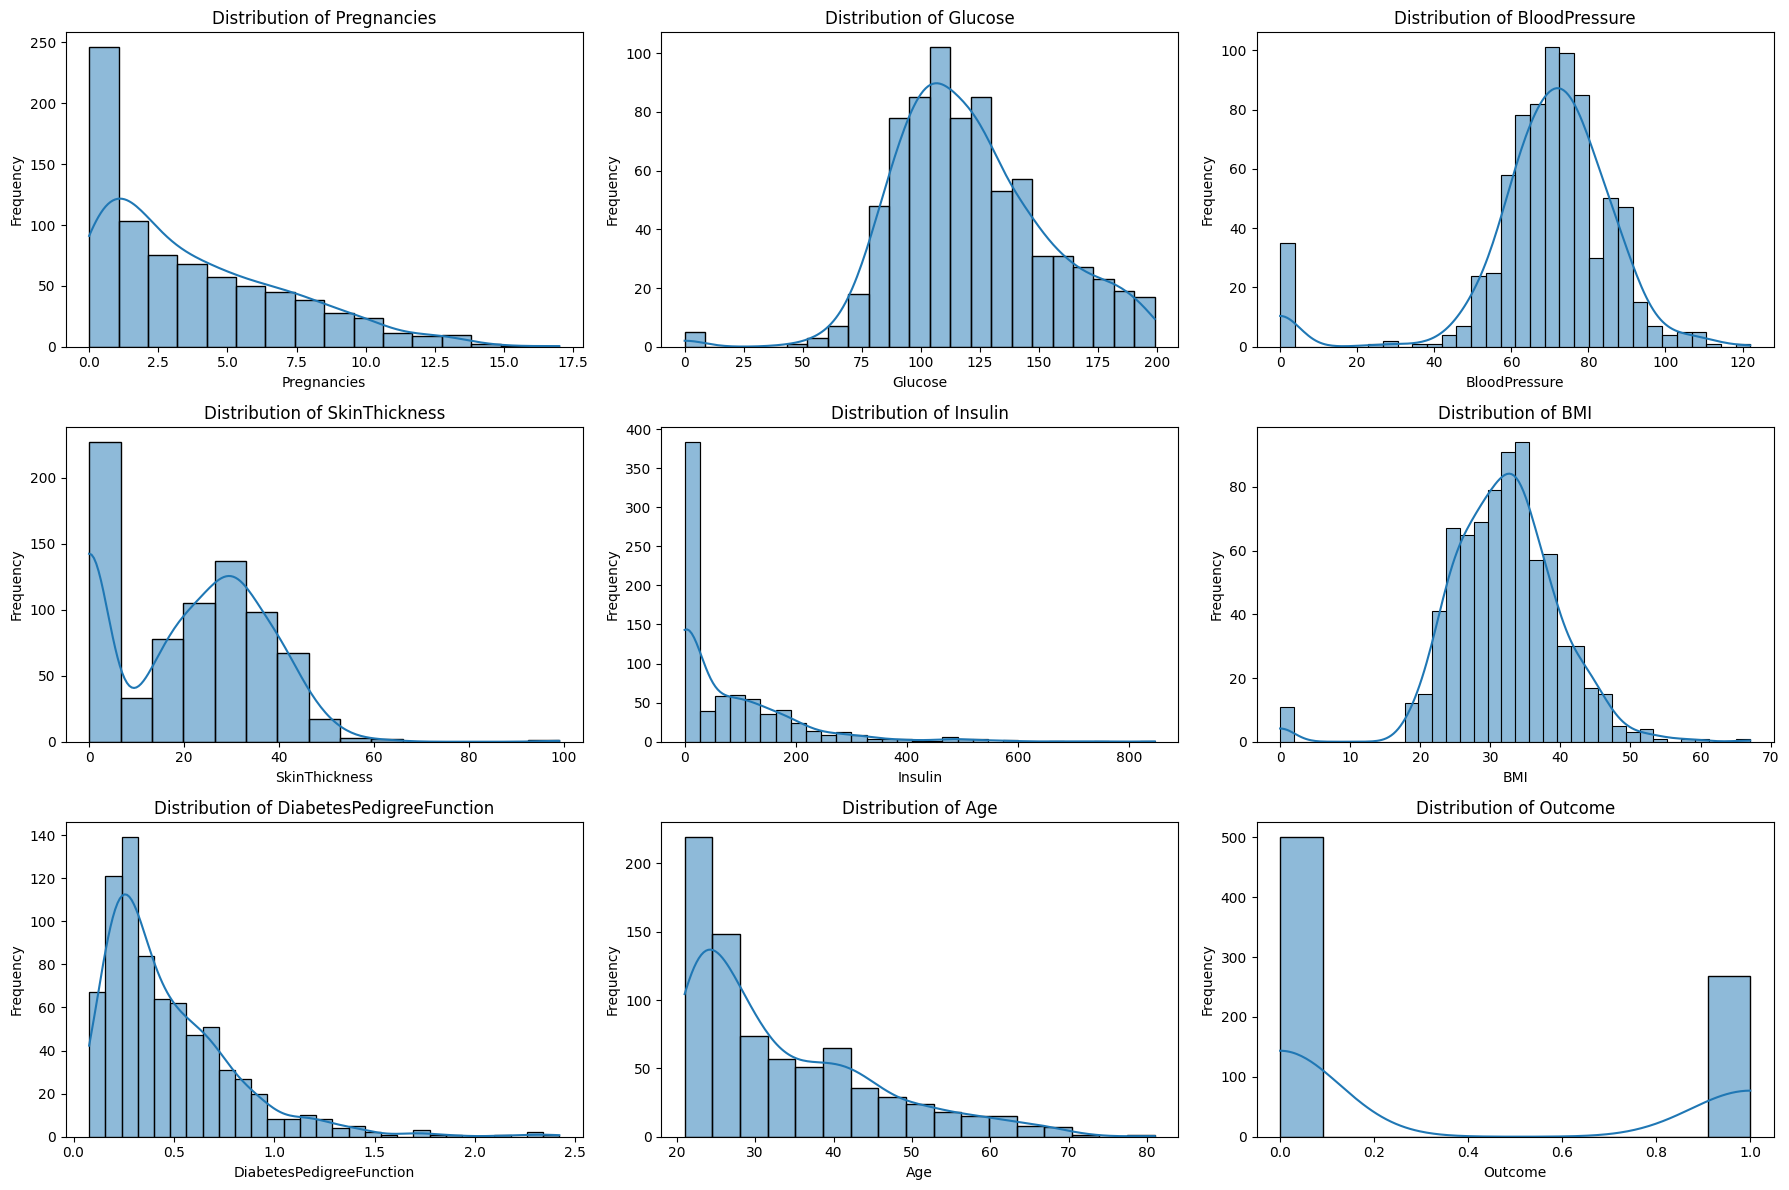

In [33]:
# Visualize the distribution of each feature
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [30]:
# Replacing 0 values with NaN
cols= ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [37]:
df_cleaned= df.copy()
for col in cols:
    median_value = df_cleaned[col][df_cleaned[col] != 0].median()
    df_cleaned.loc[df_cleaned[col] == 0, col] = median_value

In [38]:
zero_count = (df_cleaned==0).sum()
print(zero_count)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [39]:
df_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
# find outliers Use the existing Q1, Q3, IQR, lower_bound, and upper_bound variables
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction']
for col in columns_with_zeros:
    if df_cleaned[col].dtype in [np.float64, np.int64] and col != 'Outcome':
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)][col]
        print(f"{col}: {len(outliers)} outliers")
        print(f"  Range used: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print()

Glucose: 0 outliers
  Range used: [39.00, 201.00]

BloodPressure: 14 outliers
  Range used: [40.00, 104.00]

SkinThickness: 87 outliers
  Range used: [14.50, 42.50]

Insulin: 346 outliers
  Range used: [112.88, 135.88]

BMI: 8 outliers
  Range used: [13.85, 50.25]

DiabetesPedigreeFunction: 29 outliers
  Range used: [-0.33, 1.20]



In [ ]:
from sklearn.model_selection import train_test_split

# normalize the data to [0, 1] range
df_cleaned[columns_with_zeros] = (df_cleaned[columns_with_zeros] - df_cleaned[columns_with_zeros].min()) / (df_cleaned[columns_with_zeros].max() - df_cleaned[columns_with_zeros].min())

X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop('Outcome', axis=1), df_cleaned['Outcome'], test_size=0.2, random_state=42)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,0.258065,0.489796,0.239130,0.133413,0.288344,0.096499,21
618,9,0.438710,0.591837,0.184783,0.133413,0.204499,0.514091,50
346,1,0.612903,0.224490,0.130435,0.082933,0.214724,0.245944,22
294,0,0.754839,0.265306,0.239130,0.133413,0.075665,0.075149,65
231,6,0.580645,0.571429,0.326087,0.427885,0.572597,0.068318,46


In [57]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,0.258065,0.489796,0.239130,0.133413,0.288344,0.096499,21
618,9,0.438710,0.591837,0.184783,0.133413,0.204499,0.514091,50
346,1,0.612903,0.224490,0.130435,0.082933,0.214724,0.245944,22
294,0,0.754839,0.265306,0.239130,0.133413,0.075665,0.075149,65
231,6,0.580645,0.571429,0.326087,0.427885,0.572597,0.068318,46


In [58]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,0.348387,0.346939,0.282609,0.211538,0.323108,0.150299,43
324,2,0.438710,0.520408,0.271739,0.133413,0.357873,0.029889,21
624,2,0.412903,0.408163,0.239130,0.133413,0.257669,0.034159,21
690,8,0.406452,0.571429,0.239130,0.133413,0.130879,0.332195,34
473,7,0.593548,0.673469,0.239130,0.133413,0.239264,0.056362,50


In [59]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)
y_pred = linear_model.predict(X_test)

Coefficients: [ 0.0111524   0.99097259 -0.18022601  0.07326618 -0.19358881  0.76149086
  0.21029385  0.00581748]
Intercept: -0.5383899747709082


In [60]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.16
R-squared: 0.28


In [64]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [66]:
y_pred

array([ 0.31879602,  0.21992471,  0.13678467,  0.20963447,  0.48310703,
        0.44212964, -0.22017647,  0.40732655,  0.55526811,  0.70035354,
        0.29017372,  0.87142528,  0.42305949,  0.32678949,  0.06596186,
        0.41090025,  0.13234612,  0.06060606,  0.67861725,  0.53939644,
        0.25175621,  0.06723332,  0.48360667,  0.10529746,  0.53318648,
        0.85207665,  0.14244601, -0.07511578,  0.30246937,  0.13498358,
        0.89102961,  0.79630762,  0.75607743,  0.61384107,  0.53066089,
        0.65244528,  1.08719911,  0.26548825,  0.4767439 ,  0.47905715,
        0.04247959,  0.5388138 ,  0.49671448,  0.35186768, -0.09871595,
        0.53859675,  0.5711546 ,  0.23699171,  0.37892414,  1.02373243,
       -0.033721  ,  0.63535991,  0.76368552,  0.30850576,  0.15593818,
       -0.0523485 ,  0.71203788, -0.01517688,  0.42448859,  0.70083064,
        0.66456297,  0.35834646,  0.29409418,  0.25415729,  0.0631342 ,
        0.56891712, -0.04720674,  0.65431062, -0.05328311,  0.70

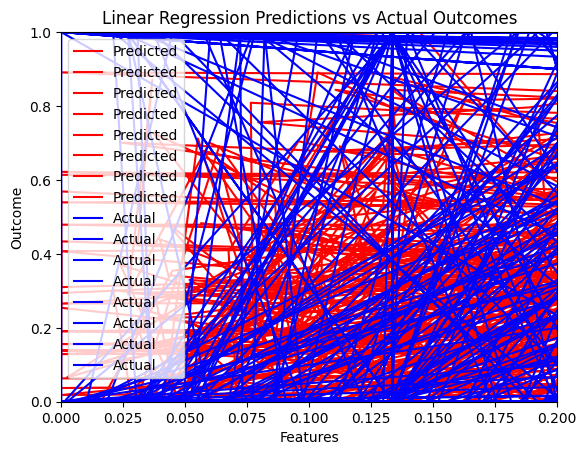

In [ ]:
plt.plot(X_test, y_pred, "r-", label='Predicted')
plt.plot(X_test, y_test,"b-", label='Actual')
plt.axis([0,0.2,0,1.0])
plt.xlabel('Features')
plt.ylabel('Outcome')
plt.title('Linear Regression Predictions vs Actual Outcomes')
plt.legend()
plt.show() 

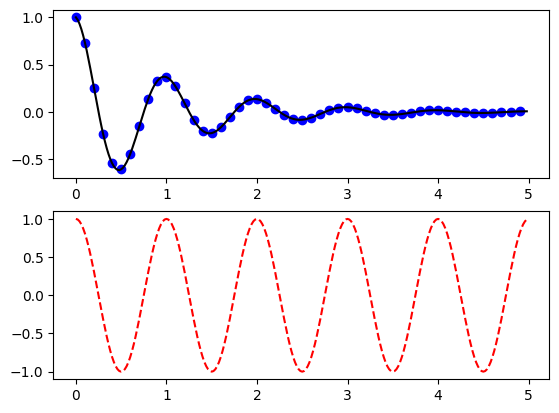

In [11]:
import numpy as np
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()